## Project :: Adult dataset anaylsis

# Data description

# Attribute info

age: continuous. 

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 

fnlwgt: continuous. 

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 

education-num: continuous. 

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-
inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 

sex: Female, Male.

capital-gain: continuous. 

capital-loss: continuous. 

hours-per-week: continuous. 

</h2>native-country</h2>: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. 

# Class Distribution: 
Probability for the label '>50K' : 23.93% / 24.78% (without unknowns) 


Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns) 

## Missing value

7% have missing values. 

Missing values - These are confined to attributes 2 (workclass), 7 (occupation) and 14 (native-country).

## Setting up the libaries

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import the data
adult_df = pd.read_csv("adult.csv")

## Giving the head , shape and describe the data 

In [4]:
adult_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
adult_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
adult_df.shape

(32561, 15)

## Finding the missing value

In [7]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
adult_df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
missing_val = ["nan","?","-"]
new_df = pd.read_csv("adult.csv",na_values=missing_val)
new_df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
#Missing values
print(new_df.isna().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [12]:
#total missing values in rows and columns
print("total number of missing value in rows",new_df.isnull().any(axis=1).sum())
print("total number of missing value in columns",new_df.isnull().any(axis=0).sum())

total number of missing value in rows 2399
total number of missing value in columns 3


## Treatment of missing value

In [13]:
new_df.drop("fnlwgt",axis=1,inplace=True)

In [14]:
new_df

,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [15]:
#place mode in workclass and occupation and country
new_df.dropna(axis=0,how='any',inplace=True)

In [16]:
new_df.shape

(30162, 14)

In [17]:
#Null value treated
new_df.isna().sum()

age               0
workclass         0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [18]:
x = 1 - len(new_df.index)/32561
print("Percentage of rows that get loss:",round(100*x),"%")

Percentage of rows that get loss: 7 %


## Univariate Anaylsis

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   education       30162 non-null  object
 3   education.num   30162 non-null  int64 
 4   marital.status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   capital.gain    30162 non-null  int64 
 10  capital.loss    30162 non-null  int64 
 11  hours.per.week  30162 non-null  int64 
 12  native.country  30162 non-null  object
 13  income          30162 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


#  ANAYLSIS OF NUMERICAL COLUMNS BY UNIVARIATAE

# Age : plots Pdfplot , histplot , boxplot

In [20]:
new_df.columns

Index(['age', 'workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income'],
      dtype='object')

In [21]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   education       30162 non-null  object
 3   education.num   30162 non-null  int64 
 4   marital.status  30162 non-null  object
 5   occupation      30162 non-null  object
 6   relationship    30162 non-null  object
 7   race            30162 non-null  object
 8   sex             30162 non-null  object
 9   capital.gain    30162 non-null  int64 
 10  capital.loss    30162 non-null  int64 
 11  hours.per.week  30162 non-null  int64 
 12  native.country  30162 non-null  object
 13  income          30162 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


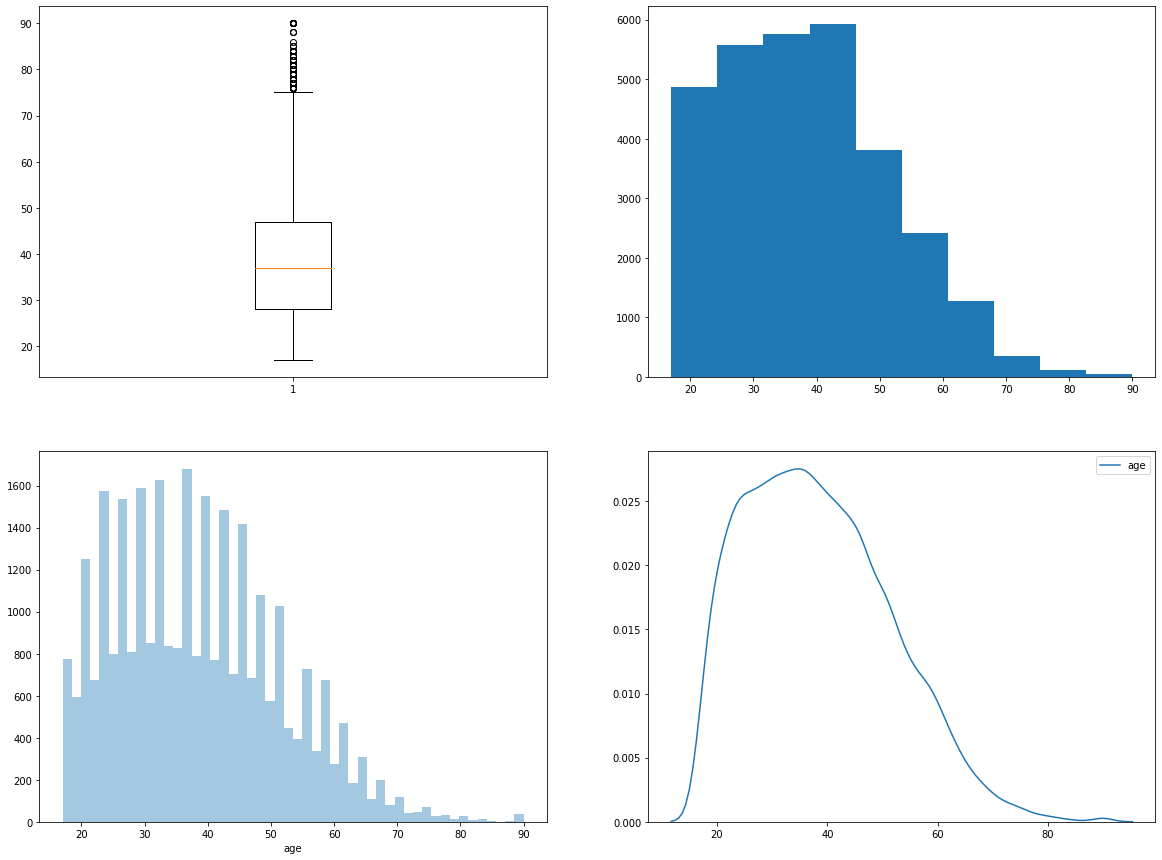

In [22]:
#age plotting
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.boxplot(new_df["age"]);
plt.subplot(2,2,2)
plt.hist(new_df["age"]);
plt.subplot(2,2,3)
sns.distplot(new_df["age"],hist=True,kde=False)
plt.subplot(2,2,4)
sns.kdeplot(new_df["age"])

### Graphs having the age columns analysis by hist,kde,box,displot... by boxplot it identified there are so many outlier and the kde is also skwed by the skwed graph it identifes the outlier and dataset having 50% of age 35   max is 75 and 75% is 55 of age

# Education_num graphs 

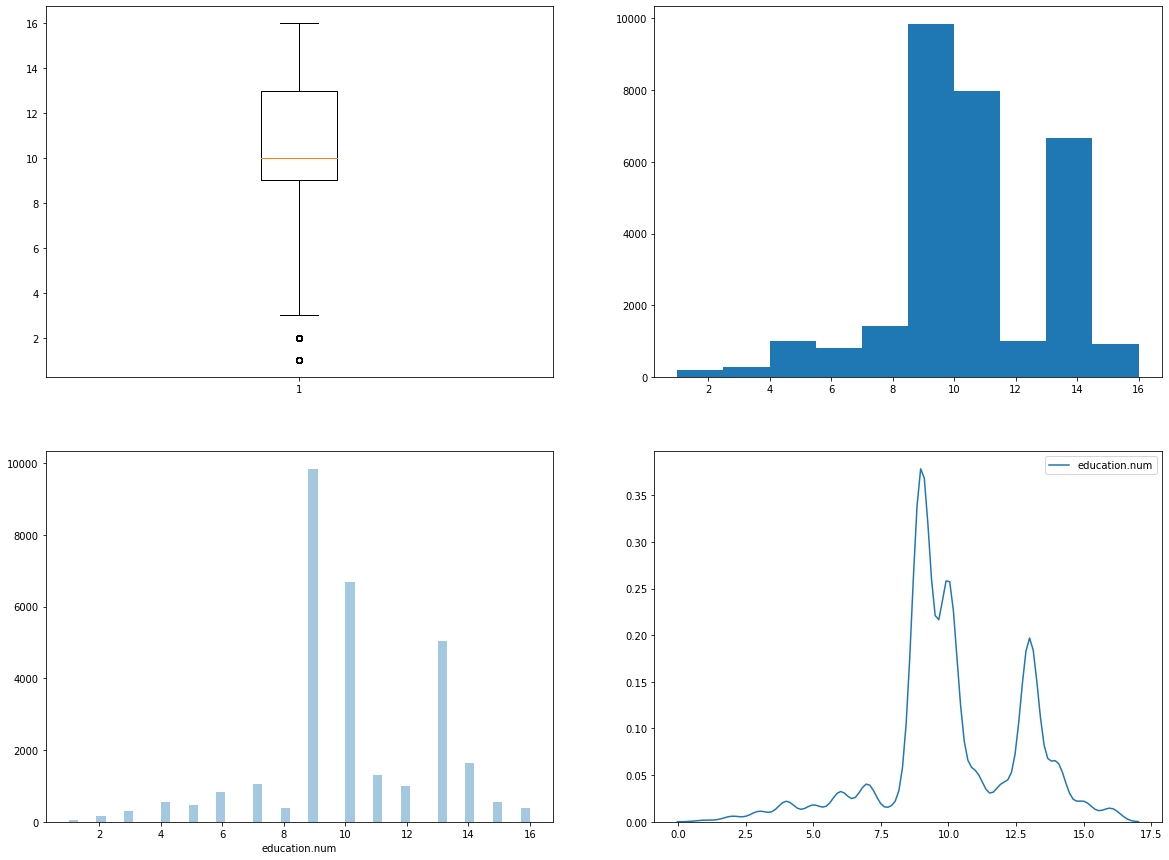

In [23]:
#plot of Educational num
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.boxplot(new_df["education.num"]);
plt.subplot(2,2,2)
plt.hist(new_df["education.num"]);
plt.subplot(2,2,3)
sns.distplot(new_df["education.num"],hist=True,kde=False)
plt.subplot(2,2,4)
sns.kdeplot(new_df["education.num"])

### Graph is education num in which this all plot can see that in kde the peak at 10 and the dist plot also convey that but having outilear and 50% is also plot or get at the frequency of 10 .Dataset may differ at between 8 - 12 

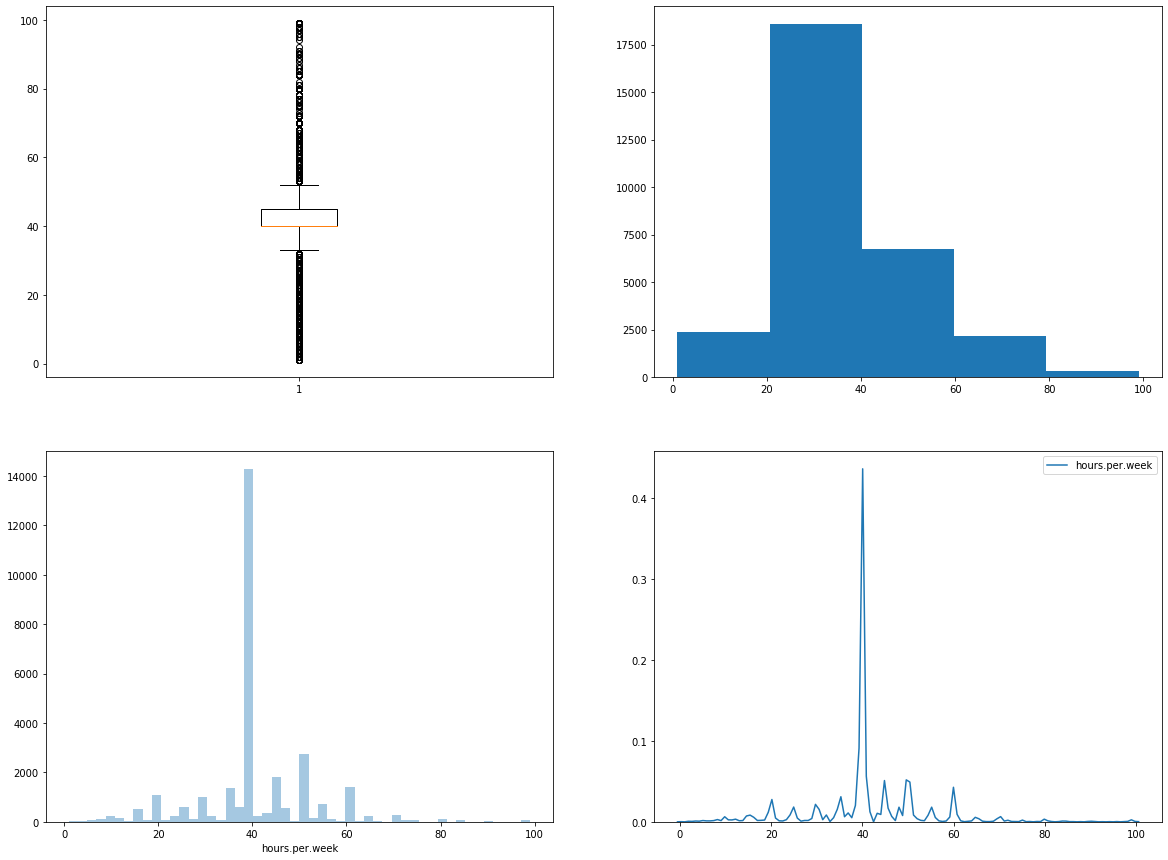

In [24]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.boxplot(new_df["hours.per.week"]);
plt.subplot(2,2,2)
plt.hist(new_df["hours.per.week"],bins=5)
plt.subplot(2,2,3)
sns.distplot(new_df["hours.per.week"],hist=True,kde=False)
plt.subplot(2,2,4)
sns.kdeplot(new_df["hours.per.week"])

### This is the graph of house per week in which boxplot take the observation that dataset frequency is between 30 - 50 and rest of the dataset are of outliers

# Anaylsis the Catagorical column 

# Count plot for catagorical columns

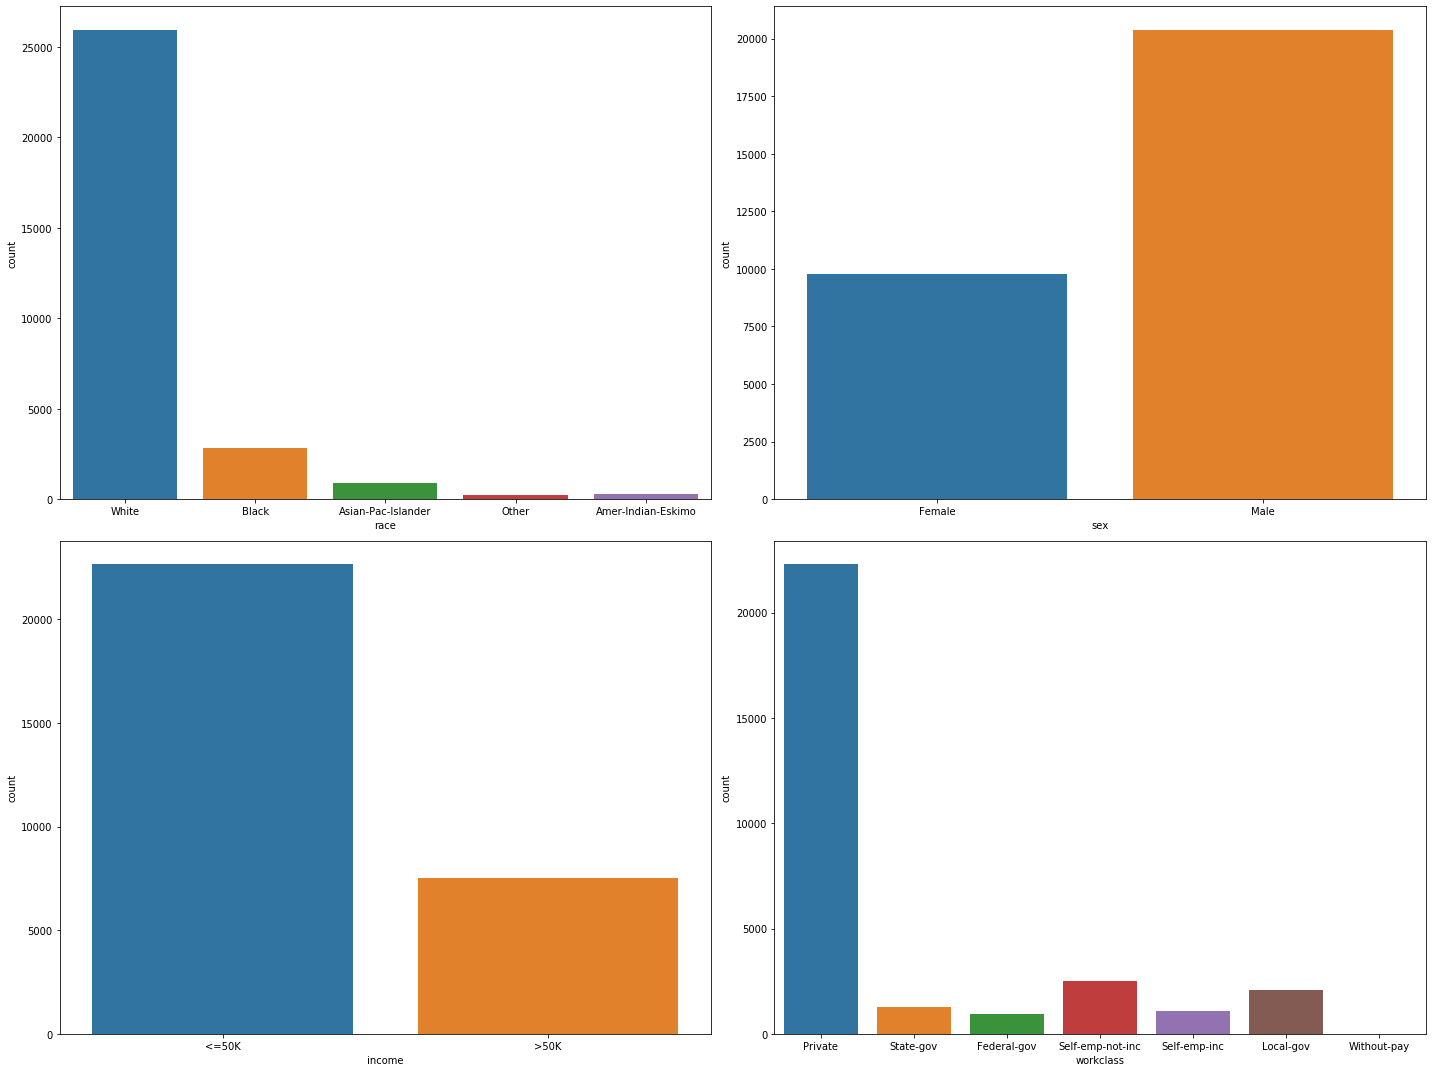

In [25]:
#plot of catagorical columns
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.countplot(new_df["race"]);
plt.subplot(2,2,2)
sns.countplot(new_df["sex"]);
plt.subplot(2,2,3)
sns.countplot(new_df["income"])
plt.subplot(2,2,4)
sns.countplot(new_df["workclass"])
plt.tight_layout()

# Bivariate anaylsis

In [26]:
new_df.describe()

,age,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,10.121312,1092.007858,88.372489,40.931238
std,13.134665,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


# Plot the heatmap to find the proper collrelation between than for numerical columns

,age,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,0.043526,0.080154,0.060165,0.101599
education.num,0.043526,1.000000,0.124416,0.079646,0.152522
capital.gain,0.080154,0.124416,1.000000,-0.032229,0.080432
capital.loss,0.060165,0.079646,-0.032229,1.000000,0.052417
hours.per.week,0.101599,0.152522,0.080432,0.052417,1.000000


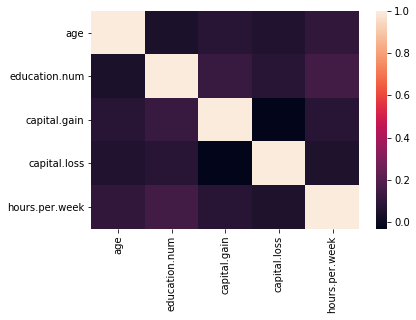

In [27]:
x = new_df.corr()
sns.heatmap(x)
x

### This heatmap convery that the columns  correlation are not that much that they can get plot on graph but the column get plot and we try with pair and scatter plot

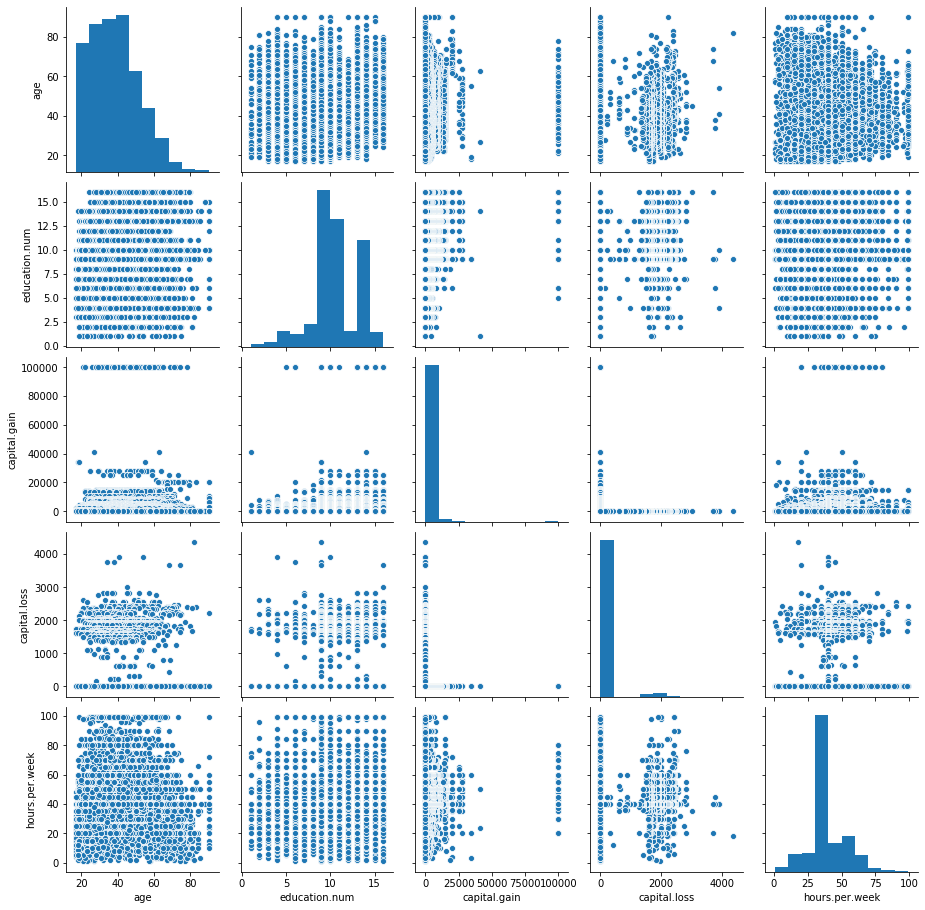

In [28]:
sns.pairplot(new_df)

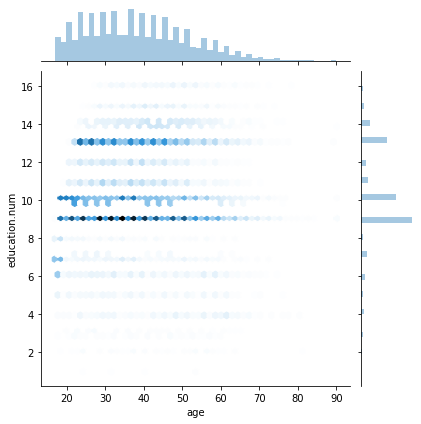

In [33]:
sns.jointplot(x='age',y='education.num',data=new_df,kind='hex')

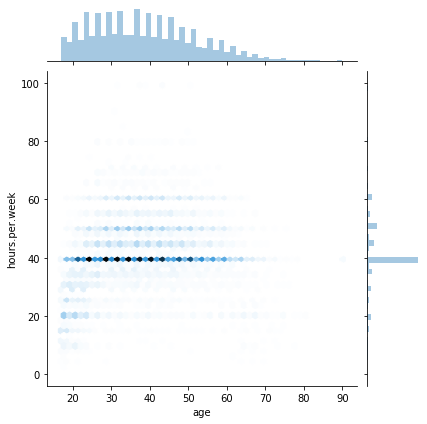

In [34]:
sns.jointplot(x='age',y='hours.per.week',data=new_df,kind='hex')

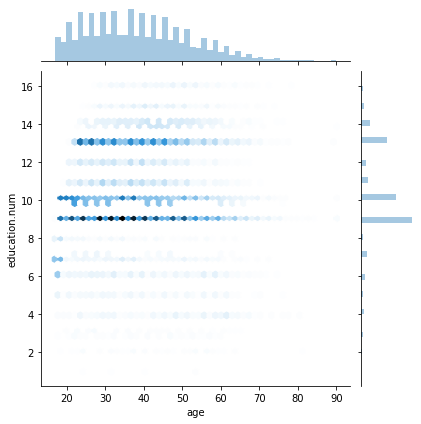

In [35]:
sns.jointplot(x='age',y='education.num',data=new_df,kind='hex')

 # BIVARIATE WITH VARIABLE COL

### I have used a lot of boxplot to plotting the graph and try to compare with income 

# # This graph is box plot having 2 different observation 

# 1 Graph
#  Age vs  marital status in which the graph of never married contain most outlier 
# 2 Graph
# This is same columns but in this  they are differentiate by income

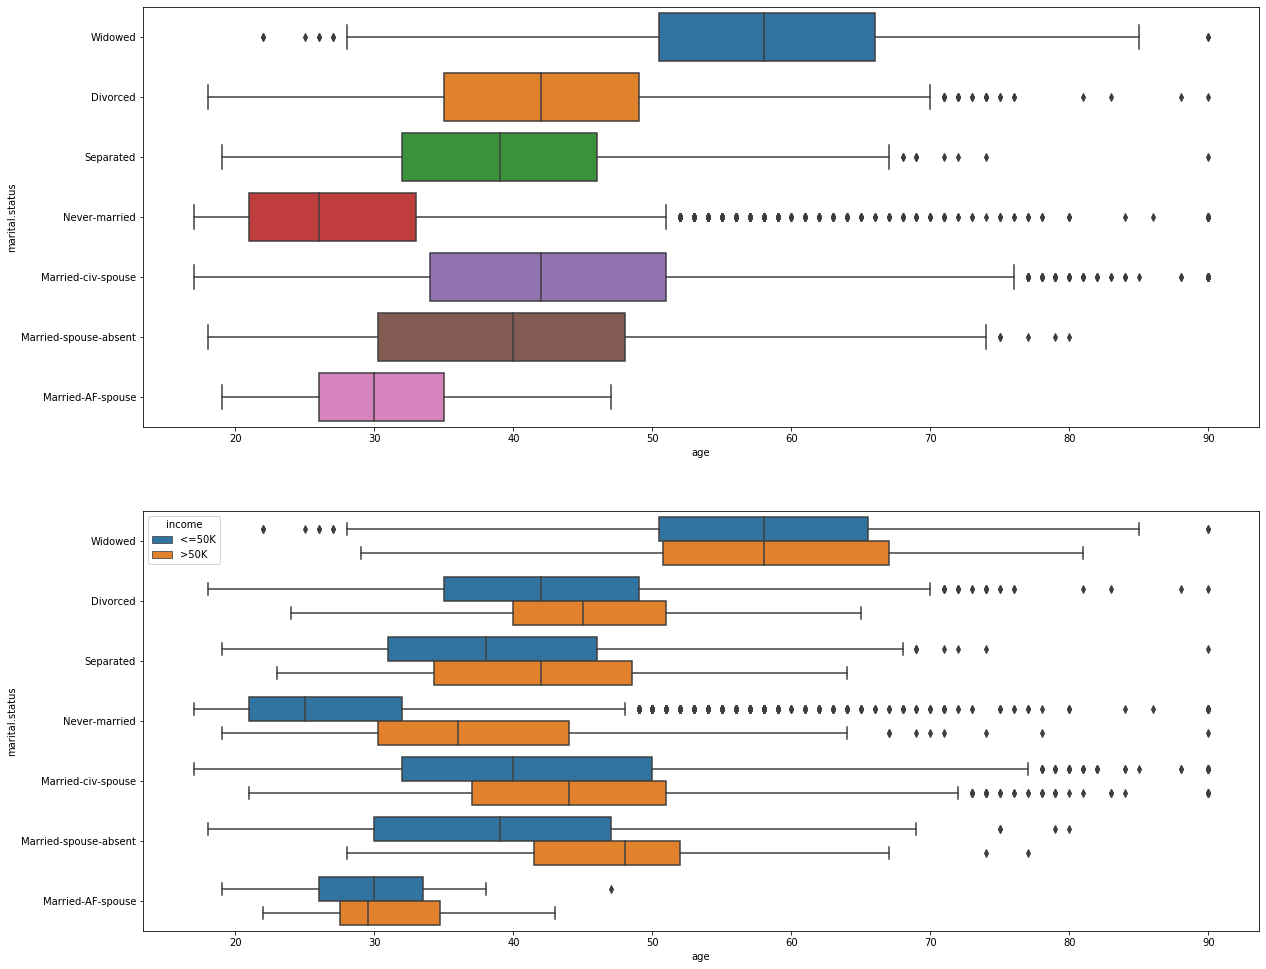

In [36]:
plt.figure(figsize=(20,17))
plt.subplot(2,1,1)
sns.boxplot(x='age',y='marital.status',data=new_df)
plt.subplot(2,1,2)
sns.boxplot(x='age',y='marital.status',data=new_df,hue='income')

# This graph is box plot having 2 different observation 

# 1 Graph
#  Age vs  income in which <=50k having  at 34 age and >=50k at 44 age
# 2 Graph
# This is same columns but in this  are according  by thier gender

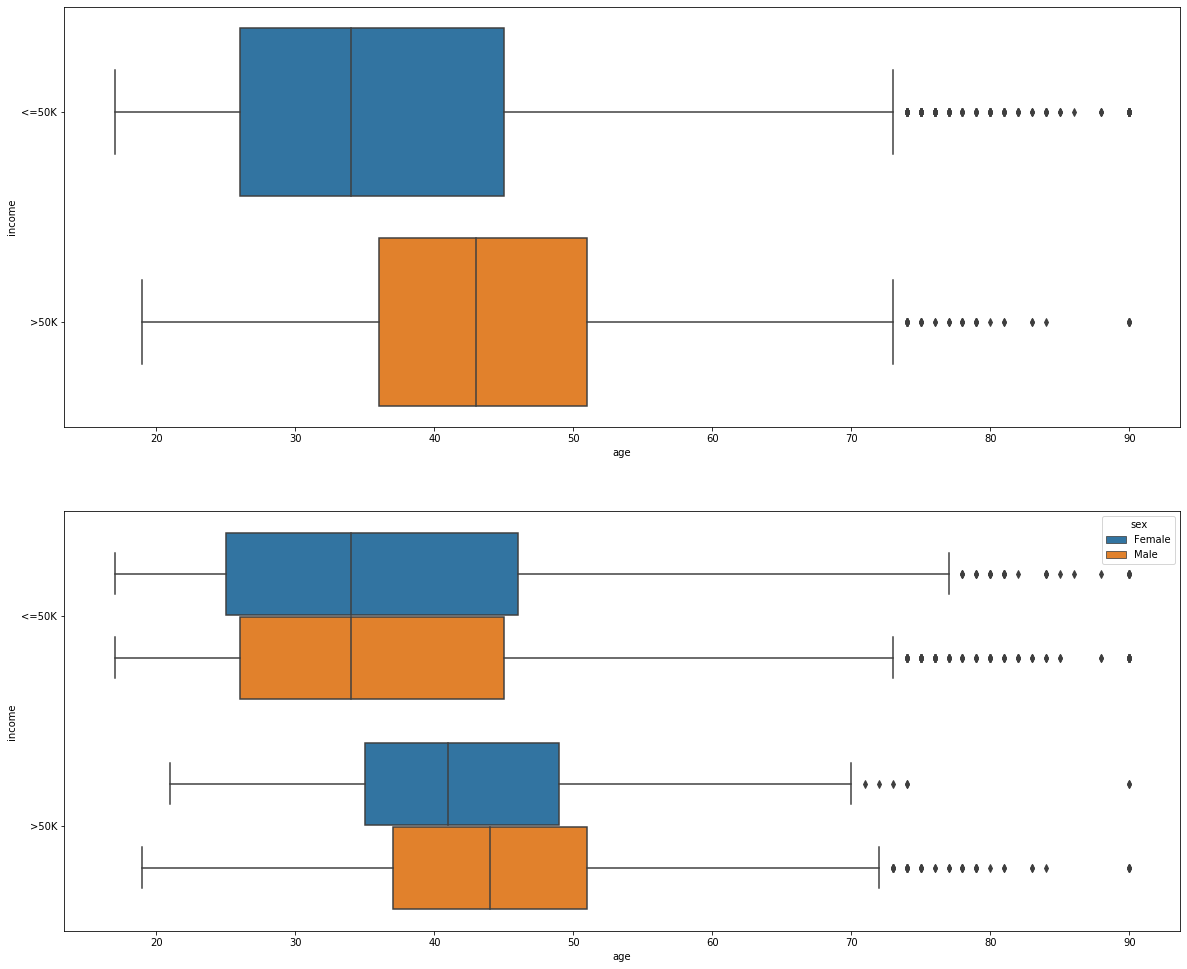

In [37]:
plt.figure(figsize=(20,17))
plt.subplot(2,1,1)
sns.boxplot(x='age',y='income',data=new_df)
plt.subplot(2,1,2)
sns.boxplot(x='age',y='income',data=new_df,hue='sex')

# This graph is box plot having 2 different observation 

# 1 Graph
#  Age vs Race graph in which it consist of many outlier.Relationship columns we get that at in dataset 5 relation define different age 
# 2 Graph
# This is same columns but in this relation are divide by thier income..Due to that we also get to know many outlier

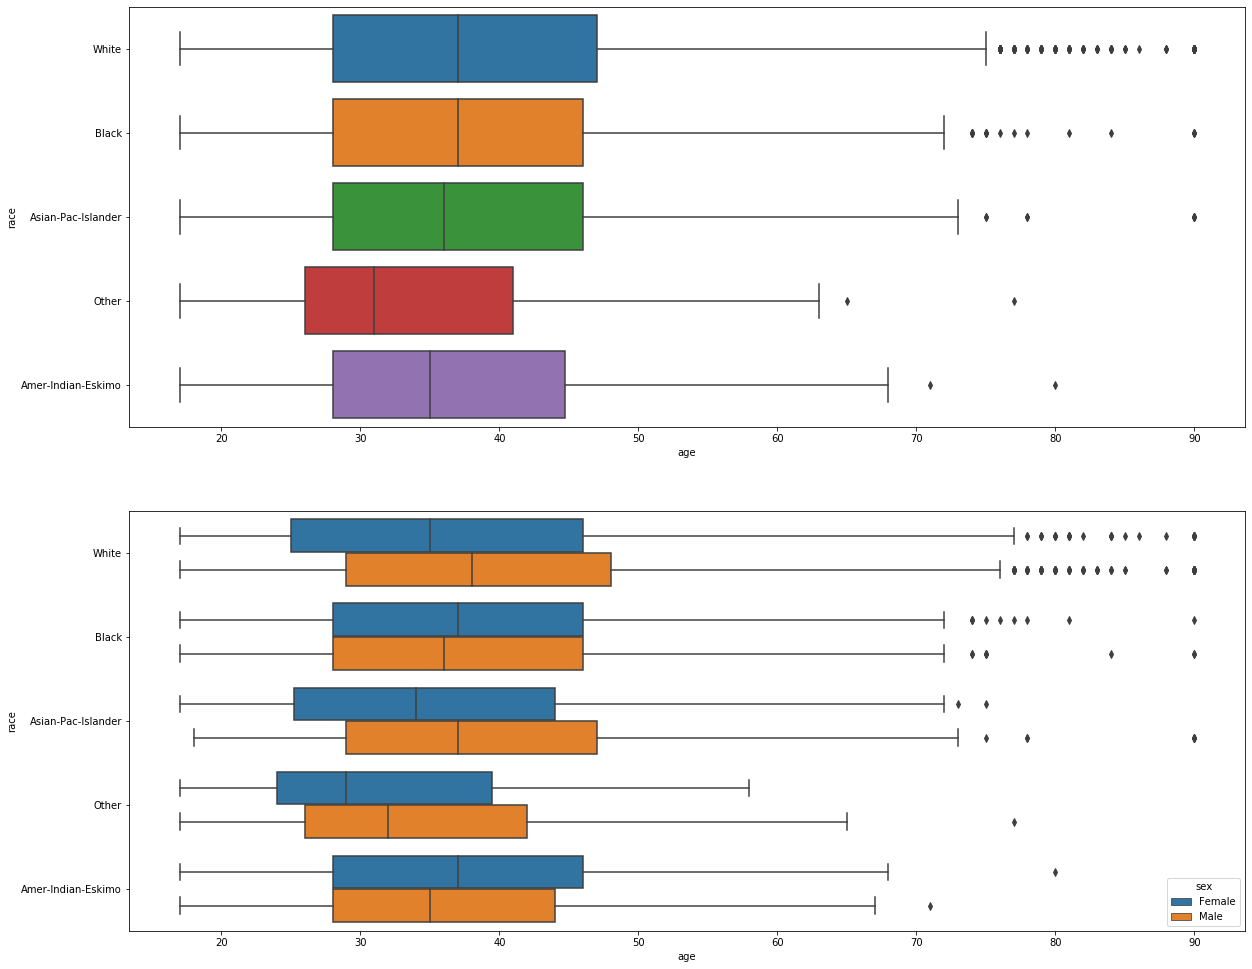

In [38]:
plt.figure(figsize=(20,17))
plt.subplot(2,1,1)
sns.boxplot(x='age',y='race',data=new_df)
plt.subplot(2,1,2)
sns.boxplot(x='age',y='race',data=new_df,hue='sex')

# This graph is box plot having 2 different observation 

# 1 Graph
#  Age vs Relation graph in which it consist of many outlier.Relationship columns we get that at in dataset 6 relation define different age 
# 2 Graph
# This is same columns but in this relation are divide by thier income

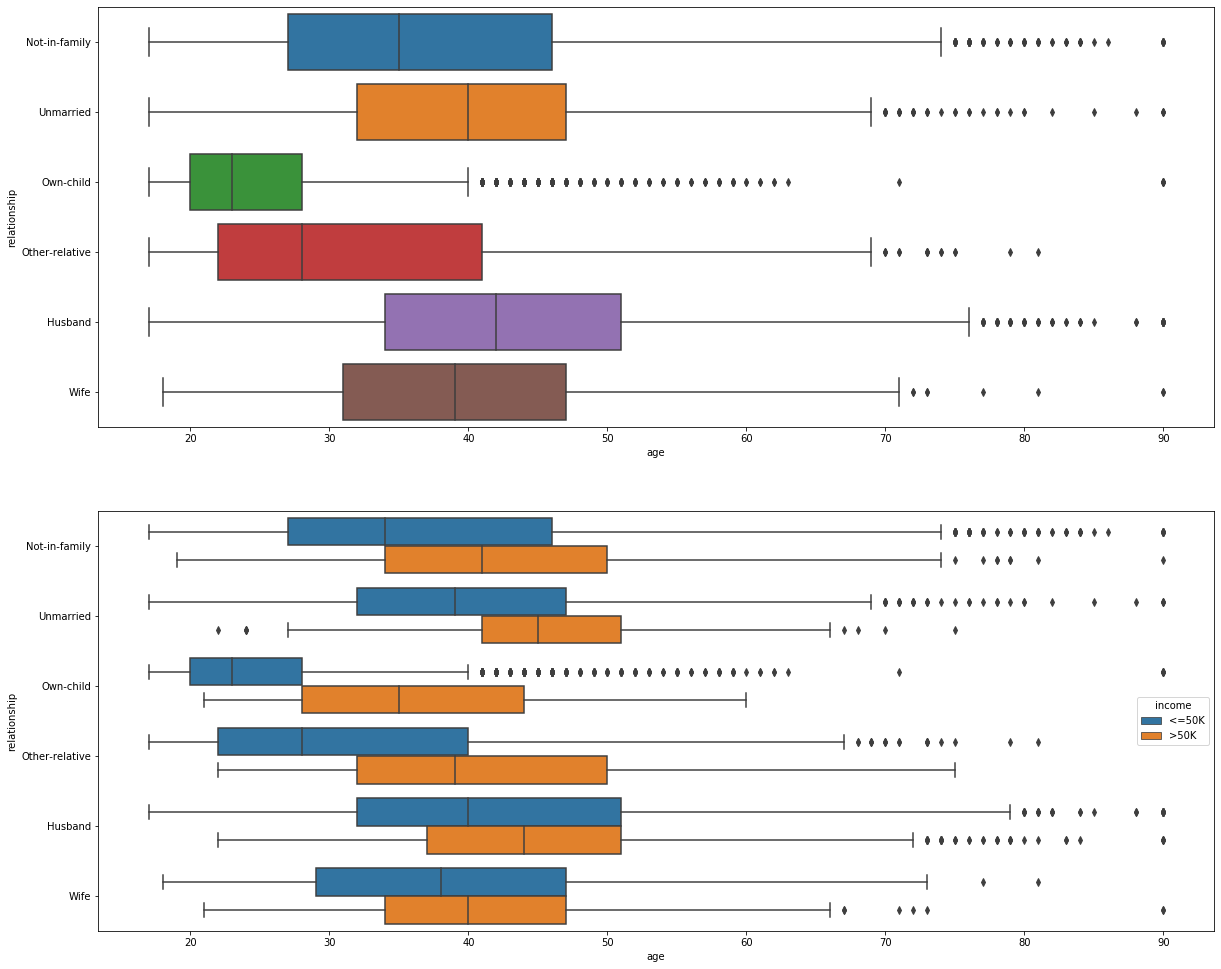

In [39]:
plt.figure(figsize=(20,17))
plt.subplot(2,1,1)
sns.boxplot(x='age',y='relationship',data=new_df)
plt.subplot(2,1,2)
sns.boxplot(x='age',y='relationship',data=new_df,hue='income')

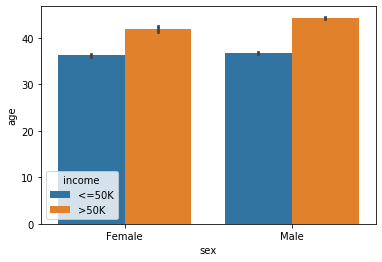

In [40]:
sns.barplot(x='sex',y='age',data=new_df,hue='income')

# Conclusion

### By analysis the dataset and it was consisting of many and manhy outlier that we  remove and analysis the data..In this to identifiy the outlier box plot help the most to analysis data.Perfering boxplot was a good descion because there was any outlier and without boxplot it get difficult to plot but kde is get used to analysis proper distribution of numerical columns numerical column having very very low correlation so that it get diffcult to analysis and the variable columns get analysis with numerical columns and use income to differenitate them at end we preform normalization and convert the variable column in dummies 

In [ ]:
from sklearn import preprocessing

In [ ]:
y = new_df.columns
print(y)

In [ ]:
data_scalling = preprocessing.MinMaxScaler()

In [ ]:
new_df_scalling = data_scalling.fit_transform(new_df)

In [30]:
pd.DataFrame(new_df_scalling,columns=y)

NameError: name 'new_df_scalling' is not defined

In [31]:
new_df_scalling = pd.get_dummies(new_df)

In [32]:
new_df_scalling.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_<=50K,income_>50K
1,82,9,0,4356,18,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,54,4,0,3900,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,41,10,0,3900,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
5,34,9,0,3770,45,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
6,38,6,0,3770,40,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
